In [1]:
import pandas as pd

df = pd.read_csv("car_data_new.csv")
df.head(1000)

,URL,Price,Transmission,Year,Motor Strength (KW),Mileage,Engine Capacity,Manufacturer,Model,Fuel Type
0,https://olx.ba/artikal/61899115,1.950 KM,Manuelni,2001,44.0,200.000km,1.2,Fiat,Punto,Benzin
1,https://olx.ba/artikal/62283007,1.450 KM,Automatik,2001,116.0,312.000km,2.2,Peugeot,607,Benzin
2,https://olx.ba/artikal/60503295,1.850 KM,Manuelni,1997,45.0,200.000km,1.2,Opel,Corsa,Benzin
3,https://olx.ba/artikal/62100159,1.650 KM,Manuelni,1998,47.0,290.000km,1.9,Volkswagen,Golf,Dizel
4,https://olx.ba/artikal/51469509,1.250 KM,Manuelni,2001,110.0,202.000km,2.0,Alfa Romeo,Alfa 156,Benzin
...,...,...,...,...,...,...,...,...,...,...
510,https://olx.ba/artikal/60450846,1.850 KM,Manuelni,2004,47.0,380.000km,1.9,Škoda,Fabia,Dizel
511,https://olx.ba/artikal/61839141,1.650 KM,Manuelni,2000,40.0,185.000km,1.0,Opel,Corsa,Benzin
512,https://olx.ba/artikal/60960602,1.450 KM,Manuelni,2001,66.0,0km,2.0,Peugeot,206,Dizel
513,https://olx.ba/artikal/56128555,1.500 KM,Manuelni,1986,74.0,283.680km,1.8,Audi,80,Plin


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  515 non-null    object 
 1   Price                515 non-null    object 
 2   Transmission         515 non-null    object 
 3   Year                 515 non-null    int64  
 4   Motor Strength (KW)  515 non-null    float64
 5   Mileage              515 non-null    object 
 6   Engine Capacity      515 non-null    float64
 7   Manufacturer         515 non-null    object 
 8   Model                515 non-null    object 
 9   Fuel Type            515 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 40.4+ KB


### PRICE

In [3]:
def clean_price(price):
    price = price.replace('.', '')
    if(',' in price):
        price = price.split(',')[0]
    else:
        price = price.split(' ')[0]
    if(price.isnumeric()):
        return int(price)
    return None

df['Price'] = df['Price'].apply(clean_price)
print(df['Price'].head())

0    1950
1    1450
2    1850
3    1650
4    1250
Name: Price, dtype: int64


In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  515 non-null    object 
 1   Price                515 non-null    int64  
 2   Transmission         515 non-null    object 
 3   Year                 515 non-null    int64  
 4   Motor Strength (KW)  515 non-null    float64
 5   Mileage              515 non-null    object 
 6   Engine Capacity      515 non-null    float64
 7   Manufacturer         515 non-null    object 
 8   Model                515 non-null    object 
 9   Fuel Type            515 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 40.4+ KB


In [5]:
df.head(1000)

,URL,Price,Transmission,Year,Motor Strength (KW),Mileage,Engine Capacity,Manufacturer,Model,Fuel Type
0,https://olx.ba/artikal/61899115,1950,Manuelni,2001,44.0,200.000km,1.2,Fiat,Punto,Benzin
1,https://olx.ba/artikal/62283007,1450,Automatik,2001,116.0,312.000km,2.2,Peugeot,607,Benzin
2,https://olx.ba/artikal/60503295,1850,Manuelni,1997,45.0,200.000km,1.2,Opel,Corsa,Benzin
3,https://olx.ba/artikal/62100159,1650,Manuelni,1998,47.0,290.000km,1.9,Volkswagen,Golf,Dizel
4,https://olx.ba/artikal/51469509,1250,Manuelni,2001,110.0,202.000km,2.0,Alfa Romeo,Alfa 156,Benzin
...,...,...,...,...,...,...,...,...,...,...
510,https://olx.ba/artikal/60450846,1850,Manuelni,2004,47.0,380.000km,1.9,Škoda,Fabia,Dizel
511,https://olx.ba/artikal/61839141,1650,Manuelni,2000,40.0,185.000km,1.0,Opel,Corsa,Benzin
512,https://olx.ba/artikal/60960602,1450,Manuelni,2001,66.0,0km,2.0,Peugeot,206,Dizel
513,https://olx.ba/artikal/56128555,1500,Manuelni,1986,74.0,283.680km,1.8,Audi,80,Plin


In [6]:
df = df[df['Price'] > 400]
df = df.sort_values('Price')
df.head()

,URL,Price,Transmission,Year,Motor Strength (KW),Mileage,Engine Capacity,Manufacturer,Model,Fuel Type
439,https://olx.ba/artikal/46016719,1050,Manuelni,1994,66.0,500.000km,1.8,Volkswagen,Golf,Plin
41,https://olx.ba/artikal/62217327,1050,Manuelni,2001,55.0,260.000km,1.4,Seat,Cordoba,Benzin
142,https://olx.ba/artikal/62229080,1050,Manuelni,1987,44.0,450.000km,1.6,Volkswagen,Golf,Dizel
496,https://olx.ba/artikal/61861898,1050,Manuelni,2000,10.0,22.222km,1.0,Seat,Arosa,Benzin
91,https://olx.ba/artikal/62276184,1100,Manuelni,2000,66.0,32.569.856km,1.4,Seat,Ibiza,Benzin


### YEAR

In [7]:
def clean_year(year):
    return int(year)

df['Year'] = df['Year'].apply(clean_year)
print(df['Year'].head())

439    1994
41     2001
142    1987
496    2000
91     2000
Name: Year, dtype: int64


### TRANSMISSION

In [8]:
transmissions_list = df['Transmission']
transmissions_set = set()
for el in transmissions_list:
    transmissions_set.add(el)
print(transmissions_set)


{'Manuelni', 'Automatik'}


In [9]:

def clean_transmission(transmission):
    if(transmission == "Manuelni"):
        return 0
    elif(transmission == "Automatik"):
        return 1
    return None

df['Transmission'] = df['Transmission'].apply(clean_transmission)
print(df['Transmission'].head())

439    0
41     0
142    0
496    0
91     0
Name: Transmission, dtype: int64


In [10]:
df = df.dropna()

transmissions_list = df['Transmission']
transmissions_set = set()
for el in transmissions_list:
    transmissions_set.add(el)
print(transmissions_set)

{0, 1}


### MOTOR STRENGTH (KW)

In [11]:
motor_strength_list = df['Motor Strength (KW)']
motor_strength_list = sorted(motor_strength_list)
print(motor_strength_list)
print(df[df['Motor Strength (KW)'] > 1000])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.5, 2.0, 2.0, 5.0, 10.0, 11.0, 25.0, 30.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 35.0, 35.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 41.0, 42.0, 42.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 45.0, 45.0, 45.0, 45.0, 45.0, 46.0, 46.0, 46.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47

(array([509.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([   0.,  139.,  278.,  417.,  556.,  695.,  834.,  973., 1112.,
        1251., 1390.]),
 <BarContainer object of 10 artists>)

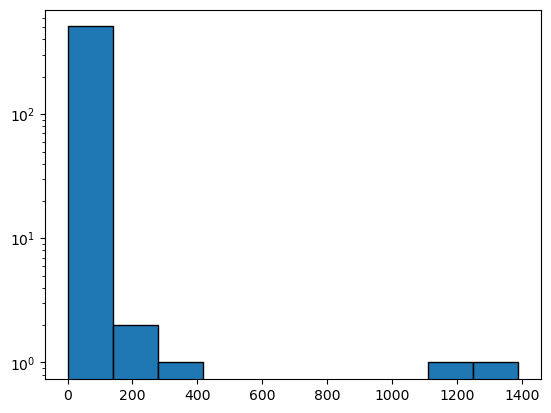

In [12]:
import matplotlib.pyplot as plt

# Convert 'Motor Strength (KW)' column to integers and plot histogram
motor_strength_int = [int(el) for el in motor_strength_list]
motor_strength_int.remove(max(motor_strength_int))
plt.hist(motor_strength_int, bins=10, edgecolor='black', log=True)

In [13]:
def clean_motor(power):
    return int(power)

df['Motor Strength (KW)'] = df['Motor Strength (KW)'].apply(clean_motor)
print(df['Motor Strength (KW)'].head())

439    66
41     55
142    44
496    10
91     66
Name: Motor Strength (KW), dtype: int64


In [14]:
# Filter rows based on 'Motor Strength (KW)' values
df = df[df['Motor Strength (KW)'] < 700]
df = df[df['Motor Strength (KW)'] > 30]

### MILEAGE

In [15]:
def clean_mileage(mileage):
    mileage = mileage.replace('.', '')
    if(',' in mileage):
        mileage = mileage.split(',')[0]
    else:
        mileage = mileage.split('km')[0]
    return int(mileage)

df['Mileage'] = df['Mileage'].apply(clean_mileage)
print(df['Mileage'].head())

439      500000
41       260000
142      450000
91     32569856
181      313009
Name: Mileage, dtype: int64


(array([496.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.00000000e+00, 1.11111111e+10, 2.22222222e+10, 3.33333333e+10,
        4.44444444e+10, 5.55555556e+10, 6.66666667e+10, 7.77777778e+10,
        8.88888889e+10, 1.00000000e+11, 1.11111111e+11]),
 <BarContainer object of 10 artists>)

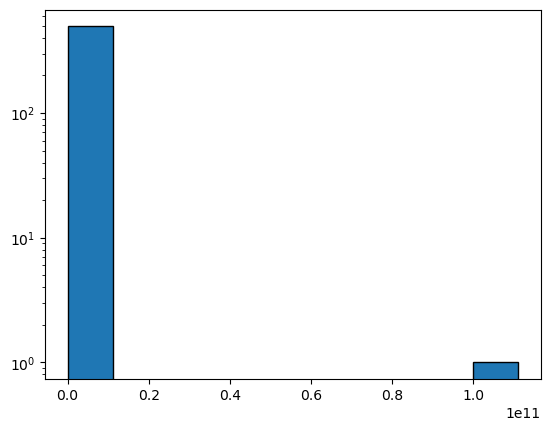

In [16]:
# Display and plot the 'Mileage' column
mileage_list = df['Mileage']
mileage_list = sorted(mileage_list)
plt.hist(mileage_list, bins=10, edgecolor='black', log=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 439 to 8
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  497 non-null    object 
 1   Price                497 non-null    int64  
 2   Transmission         497 non-null    int64  
 3   Year                 497 non-null    int64  
 4   Motor Strength (KW)  497 non-null    int64  
 5   Mileage              497 non-null    int64  
 6   Engine Capacity      497 non-null    float64
 7   Manufacturer         497 non-null    object 
 8   Model                497 non-null    object 
 9   Fuel Type            497 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 42.7+ KB


In [18]:
df = df[df['Mileage'] < 1000000]
df.head()

,URL,Price,Transmission,Year,Motor Strength (KW),Mileage,Engine Capacity,Manufacturer,Model,Fuel Type
439,https://olx.ba/artikal/46016719,1050,0,1994,66,500000,1.8,Volkswagen,Golf,Plin
41,https://olx.ba/artikal/62217327,1050,0,2001,55,260000,1.4,Seat,Cordoba,Benzin
142,https://olx.ba/artikal/62229080,1050,0,1987,44,450000,1.6,Volkswagen,Golf,Dizel
181,https://olx.ba/artikal/62209884,1100,0,1996,74,313009,1.6,Audi,A4,Benzin
27,https://olx.ba/artikal/62277300,1100,0,1997,47,300000,1.8,Ford,Courier,Dizel


### ENGINE CAPACITY

(array([ 24.,  66.,  19.,  62., 108.,  42., 142.,   0.,  13.,   5.]),
 array([0.9 , 1.06, 1.22, 1.38, 1.54, 1.7 , 1.86, 2.02, 2.18, 2.34, 2.5 ]),
 <BarContainer object of 10 artists>)

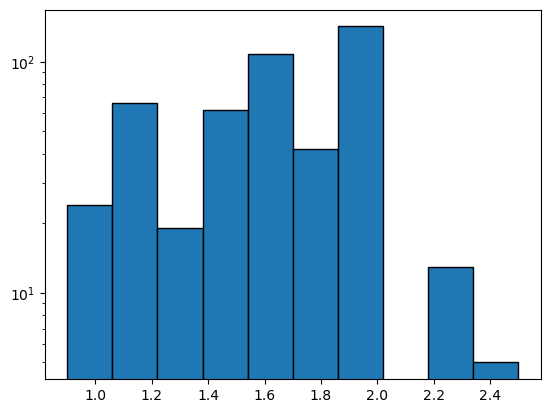

In [19]:
# Display and plot the 'Engine Capacity' column
engine_capacity_list = df['Engine Capacity']
engine_capacity_list = sorted(engine_capacity_list)
plt.hist(engine_capacity_list, bins=10, edgecolor='black', log=True)

### CORRELATION MATRIX HEATMAP

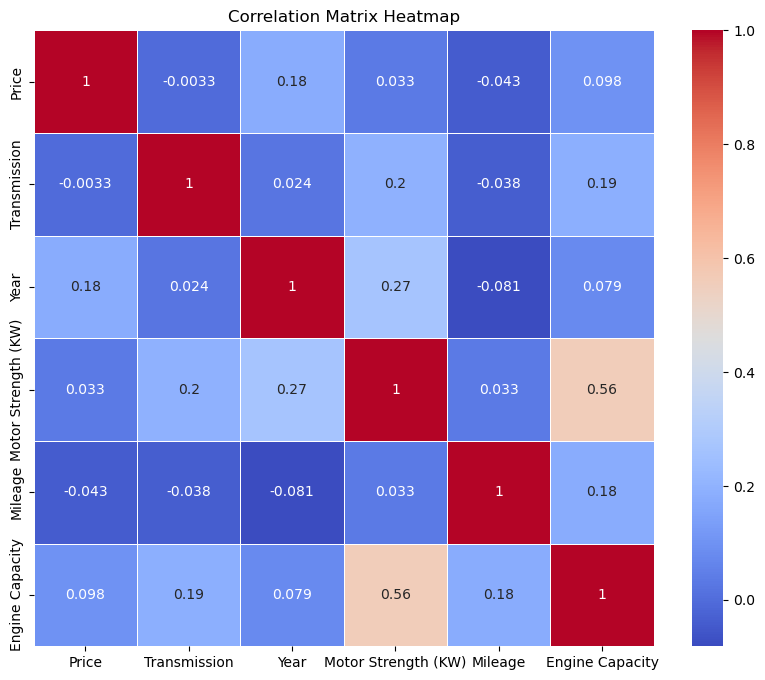

In [20]:
import seaborn as sns

help = df.drop(columns=['URL', 'Manufacturer', 'Model', 'Fuel Type'])
corr_matrix = help.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### OTHER

In [21]:
# Display unique values in 'Fuel Type', 'Model', and 'Manufacturer' columns

fuel_type_list = df['Fuel Type']
fuel_type_set = set()
for el in fuel_type_list:
    fuel_type_set.add(el)
print(fuel_type_set)

manufacturers_list = df['Manufacturer']
manufacturers_set = set()
for el in manufacturers_list:
    manufacturers_set.add(el)
print(manufacturers_set)

models_list = df['Model']
models_set = set()
for el in models_list:
    models_set.add(el)
print(models_set)

{'Benzin', 'Plin', 'Dizel'}
{'Nissan', 'Subaru', 'Renault', 'Chevrolet', 'Kia', 'Zastava', 'Lancia', 'Škoda', 'Alfa Romeo', 'Lada', 'Daewoo', 'Opel', 'Fiat', 'Mercedes-Benz', 'Ford', 'Volvo', 'Peugeot', 'Mazda', 'Suzuki', 'Honda', 'Hyundai', 'Audi', 'Seat', 'BMW', 'Citroen', 'Volkswagen'}
{'E 220', 'Yugo Koral', 'Courier', 'Justy', 'A6', 'Golf', 'Laguna', 'Felicia', '626', 'Astra', 'SAXO', '306', 'Bravo', 'Almera', 'Toledo', '318', 'Ulysse', 'Lanos', 'V40', 'R 5', 'Polo', 'Legacy', 'Vectra', 'Rocks-e', 'A 170', 'Xsara Picasso', 'C 180', 'C 220', 'Lybra', '406', 'A 180', 'Kangoo', 'Phedra', 'Twingo', 'Partner', 'C 200', 'Scenic', 'C5', 'Alto', 'Drugi', '206', 'Alfa 147', 'Punto', 'Sierra', 'Swift', 'Fiesta', 'A 140', 'A4', 'Vento', 'Espace', 'Escort', '407', 'Impreza', 'H 100', 'Cordoba', 'Clio', 'Alfa 146', 'Xantia', '307', 'Primera', 'Stilo', 'Spark', 'Lupo', 'Sharan', 'Galaxy', 'E 230', 'Ka / Ka+', 'Brava', 'Seicento', 'CE 220', 'Accent', '520', 'Marea', 'A 190', 'Megane', 'Atos', 'F

In [22]:
df = df.drop(columns=['URL'])

# Filter and merge data based on 'Manufacturer' and 'Model'
grouped = df.groupby(['Manufacturer', 'Model']).size().reset_index(name='Count')
filtered = grouped[grouped['Count'] >= 5] # increase the number with a larger dataset
df = pd.merge(df, filtered[['Manufacturer', 'Model']], on=['Manufacturer', 'Model'], how='inner')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                342 non-null    int64  
 1   Transmission         342 non-null    int64  
 2   Year                 342 non-null    int64  
 3   Motor Strength (KW)  342 non-null    int64  
 4   Mileage              342 non-null    int64  
 5   Engine Capacity      342 non-null    float64
 6   Manufacturer         342 non-null    object 
 7   Model                342 non-null    object 
 8   Fuel Type            342 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 24.2+ KB


In [23]:
manufacturers_list = df['Manufacturer']
manufacturers_set = set()
for el in manufacturers_list:
    manufacturers_set.add(el)
print(manufacturers_set)

models_list = df['Model']
models_set = set()
for el in models_list:
    models_set.add(el)
print(models_set)

{'Seat', 'Audi', 'Ford', 'Škoda', 'Alfa Romeo', 'Peugeot', 'Renault', 'Citroen', 'Volkswagen', 'Opel', 'Fiat'}
{'Twingo', 'Cordoba', 'Clio', 'Ibiza', 'Scenic', 'Golf', '80', 'Felicia', 'Mondeo', '206', 'Astra', 'Alfa 147', 'SAXO', '306', 'Punto', 'Corsa', 'Megane', 'Polo', 'Fiesta', 'Passat', 'Jetta', 'Focus', 'Vectra'}


In [24]:
# Copy and encode categorical columns
df_copy = df.copy()
df = pd.get_dummies(df, columns=['Model', 'Manufacturer', 'Fuel Type'])
print(df.shape)

# Concatenate the original and encoded dataframes
df = pd.concat([df, df_copy], axis=1, join='outer')
print(df.shape)

(342, 43)
(342, 52)


In [25]:
# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()].copy()
print(df.shape)

(342, 46)


In [26]:
# Save the cleaned data to a new CSV file
df.to_csv('cleaned_car_data_new.csv', index=False)
print("Data preprocessing completed.")

Data preprocessing completed.
